0.9629629629629629 0.9904761904761905 0.9765258215962442


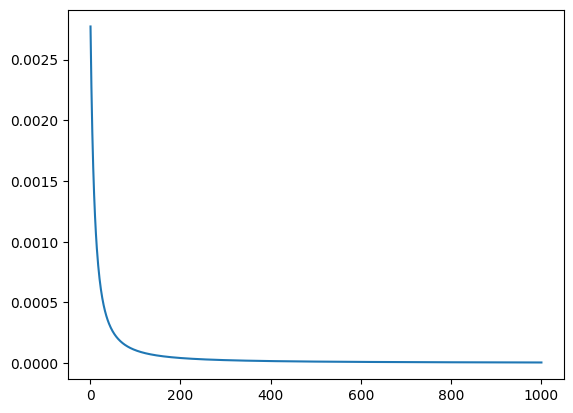

In [4]:
# Textbook: Principles and Practices of Machine Learning
# Alcohol dataset
# Author: Zhe Chen (ml_iot@163.com), 2021
import pandas
import numpy as np
import matplotlib.pyplot as plt
# load dataset
df = pandas.read_csv(r'E:\Study\Python\the_fourth_course\alcohol_dataset.csv')
data = np.array(df)
learn_rate=0.1
iteration=1000
m_all=np.shape(data)[0]
m_train=250
m_test=m_all-m_train
d=np.shape(data)[1] - 1
#特征缩放
x_mean=np.mean(data[:,:d],axis=0)
x_std=np.std(data[:,:d],axis=0,ddof=0)
data[:,:d]=(data[:,:d]-x_mean)/x_std
#划分测试集和训练集
rng=np.random.default_rng(1)
rng.shuffle(data,axis=0)
x_train=data[:m_train,:d].T
x_test=data[m_train:,:d].T
y_train=data[:m_train,d].reshape(1,-1)
y_test=data[m_train:,d].reshape(1,-1)

#训练参数
w=np.zeros((1,d)).reshape(-1,1)
b=0
cost_saved=[]
v = np.ones((1, m_train))
#训练
for i in range(iteration):
    y_hat=np.exp(np.dot(w.T,x_train)+b)/(1+np.exp(np.dot(w.T,x_train)+b))
    y_hat_ba=1-y_hat
    y_train_ba=1-y_train
    e=y_hat-y_train
    w=w-2*learn_rate*np.dot(x_train,e.T)/m_train
    b=b-2*learn_rate*np.dot(v,e.T)/m_train
    cost=-1/m_train*(np.log(y_hat)*y_train.T+np.log(y_hat_ba)*y_train_ba.T)
    cost_saved.append(cost.item(0))
y_hat=np.squeeze(y_hat)
y_train=np.squeeze(y_train)
true_number=0
false_number=0
t=[]
TP=0#真阳
FP=0#假阳
FN=0#假阴
TN=0#zhen阳
for i in range(m_train):
    if y_hat[i]>=0.5 and y_train[i]==1:
        TP+=1
    elif y_hat[i]>=0.5 and y_train[i]==0:
        FP+=1
    elif y_hat[i]<0.5 and y_train[i]==0 :
        TN+=1
    else:FN+=1
recall=TP/(TP+FN)
precision=TP/(TP+FP)
f1=2*recall*precision/(recall+precision)
print(recall,precision,f1)
plt.plot(range(1,iteration+1),cost_saved)
plt.show()
